In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import states_abbrevs
from states_abbrevs import dict2
import glob

In [3]:
path = r"..\data\incinequality_data"
files = glob.glob(path + "/*.csv")
years = [y for y in range(2011,2020)]
li=[]

for (f,y) in zip(files,years):
    df = pd.read_csv(f, index_col=None, header=0)
    df = df.loc[1:] #removes unnecessary column description
    df['Year'] = y
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
dfc = frame.copy()

In [14]:
ineq = dfc.loc[:,['NAME','Year','B19083_001E']]
ineq.rename(columns = {'NAME':'County','B19083_001E':'Gini_Index'}, inplace=True)

### Column formatting

In [5]:
def formatloc(df):
    df['county']= df['County'].str.split(',',1,expand=True)[0]
    df['State'] = df['County'].str.split(',',1,expand=True)[1]
    df['State'] = df['State'].apply(lambda x: x.strip())
    df['State'] = df['State'].map(dict2)
    df['County'] = df['county'] + ',' + df['State']
    df.drop('county',axis=1,inplace=True)


In [15]:
formatloc(ineq)
ineq = ineq.loc[ineq.State != 'PR']
ineq['Year'] = pd.to_datetime(ineq['Year'],format='%Y').dt.year
ineq['Gini_Index'] = ineq['Gini_Index'].map(float)

In [16]:
yearmonth = pd.DataFrame({'Year': np.arange(ineq['Year'].min(), ineq['Year'].max() + 1).repeat(12),
                          'Month': list(np.arange(1, 13)) * (ineq['Year'].max() - ineq['Year'].min() + 1)})

ineq = pd.merge(ineq, yearmonth, on = 'Year')
ineq['Year_Month'] = ineq['Year'].map(str) + '_' + ineq['Month'].map(str)

---

In [19]:
#ineq.to_csv('gini_ineq.csv')

---

# EDA

In [43]:
import seaborn as sns

- The Gini Index is a summary measure of income inequality. The Gini coefficient incorporates the detailed shares data into a single statistic, which summarizes the dispersion of income across the entire income distribution. 

- The Gini coefficient ranges from 0, indicating perfect equality (where everyone receives an equal share), to 1, perfect inequality (where only one recipient or group of recipients receives all the income). 

- The Gini is based on the difference between the Lorenz curve (the observed cumulative income distribution) and the notion of a perfectly equal income distribution.

### Historically, counties with the highest level of income inequality

In [33]:
ineq.groupby(['County','Year'], as_index=False)['Gini_Index'].mean().nlargest(5,'Gini_Index')

,County,Year,Gini_Index
5392,"Putnam County,TN",2013,0.6286
4753,"New York County,NY",2013,0.6012
4755,"New York County,NY",2015,0.6011
4751,"New York County,NY",2011,0.5990
4752,"New York County,NY",2012,0.5962


### Highest average level of income inequality over 2011-2019

<AxesSubplot:title={'center':'Highest Average of Income Inequality by County'}, xlabel='County'>

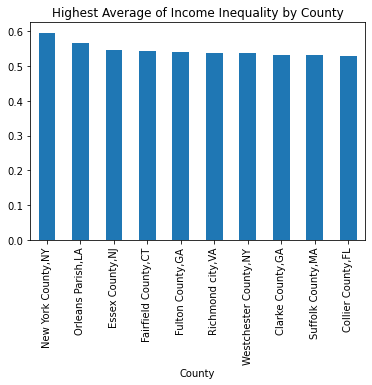

In [101]:
ineq.groupby('County')['Gini_Index'].mean().nlargest(10).plot(kind='bar', title='Highest Average of Income Inequality by County')

### Counties with the highest level of income inequality in 2019

<AxesSubplot:title={'center':'Top 5 Counties Income Inequality (2019)'}, xlabel='County'>

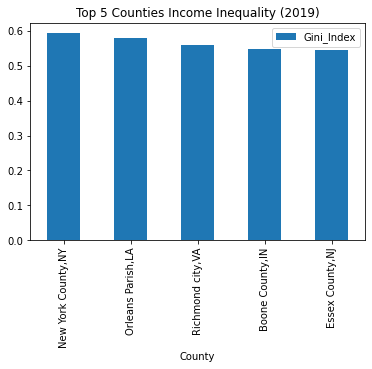

In [99]:
ineq.loc[ineq.Year_Month == '2019_12'].nlargest(5,'Gini_Index').plot(kind='bar',x='County',y='Gini_Index',title='Top 5 Counties Income Inequality (2019)')


### Most Prevalent Gini Index in the Nation

<AxesSubplot:xlabel='Gini_Index', ylabel='Density'>

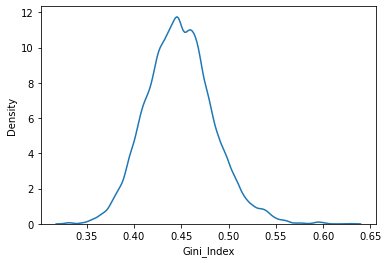

In [137]:
sns.kdeplot(ineq.Gini_Index)

- It seems that most counties in the US have a gini index just below 0.45. This means that income inequality generally does exist but its not that rampant. 

### Exploring New York County

<AxesSubplot:title={'center':'New York County Gini Index'}, xlabel='Year'>

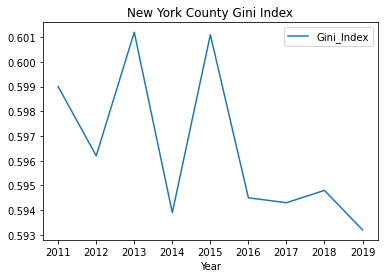

In [138]:
ineq[ineq.County == 'New York County,NY'].plot(kind='line',x='Year',y='Gini_Index', title='New York County Gini Index')

- it seems Gini index is seeing a downwards trend, however it is still on average the highest in the nation.

<AxesSubplot:xlabel='Gini_Index', ylabel='Density'>

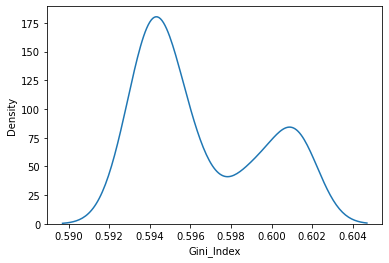

In [49]:
sns.kdeplot(ineq.query("County == 'New York County,NY'").Gini_Index)

- A Gini index of around 0.594 occurs most frequently

## Growing inequality 

In [119]:
ineq['pct_change'] = ineq.groupby('County', as_index=False)['Gini_Index'].pct_change()

<AxesSubplot:title={'center':'Highest Average Percent Change in Income Inequality'}, xlabel='County'>

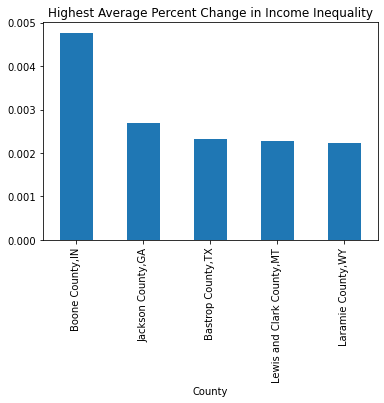

In [136]:
ineq.groupby('County')['pct_change'].mean().nlargest().plot(kind='bar',title='Highest Average Percent Change in Income Inequality')

- These counties have the highest average percent change of Gini Index indicating most rapid growth of income inequality between 2011 and 2019